First we load the csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Auto.csv to Auto (2).csv


# 1. Read the Auto data
In this section we read the "Auto.csv" using the pandas library and store it into variable df (short for dataframe). Then, we print the first few rows of the df using the built-in *head()* function

In [ ]:
import pandas as pd
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


Next we want to check the dimensions of the data. We us *df.shape* to get the number of rows and column in the data

In [ ]:
row, col = df.shape
print(f"The number of rows in data are: {row}")
print(f"The number of columns in data are: {col}")

The number of rows in data are: 392
The number of columns in data are: 9


# 2. Data exploration with code
In this section we explore the data using *describe()* function on the mpg, weight, and year columns

In [ ]:
preferred_columns = df.loc[:,["mpg","weight", "year"]]
preferred_columns.describe()

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


The average for mpg, weight and year are 23.445918, 2977.584184 and	76.010256 repectively. From this we can determine what the middle value be or the most occuring value. From our statistics for the data we can say that the most of the values in mpg, weight and year are around 23.445918, 2977.584184 and	76.010256 repectively.

In [ ]:
preferred_columns.max() - preferred_columns.min()

mpg         37.6
weight    3527.0
year        12.0
dtype: float64

Here we calculated the range for mpg, weight and year by getting the difference between the max and min value of the respective columns. Range is a useful metric as it helps us to identify any outliers in the dataset. If any value is out of range in the dataset then that value can be refered as an outlier

# 3. Explore data types
In this section we explore tha data types of the columns in the data as well as changing some columns to categorical data. Here, we check the datatypes of the columns

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Changing the cylinders and origin column to categorical

In [ ]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')

Verifying the changes made

In [ ]:
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

as we can see before the cylinder and origin column was int64 but after categorizing we get cylinders as int8 and origin as a category

# 4. Dealing with NAs
In this section we will delete NAs and output the new dimensions

In [ ]:
df = df.dropna()
print(df.shape)

(389, 9)


We can see that the number of rows have been reduce to 389 meaning there were 3 NAs in our dataset

# Modifying columns
In this section we modify the columns. We make new categorical column called mpg_high based on if the mpg at current index is greater than the average. In addition to that we also drop the mpg and name columns so the algorithm doesn’t just learn
to predict mpg_high from mpg

In [ ]:
average_mpg = df.mpg.mean()
average_mpg

23.490488431876607

In [ ]:
df['mpg_high'] = [1 if x > average_mpg else 0 for x in df["mpg"]]
df.sample(n=5)

<ipython-input-305-ab8f74274766>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg_high'] = [1 if x > average_mpg else 0 for x in df["mpg"]]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
218,33.5,1,85.0,70,1945,16.8,77.0,3,datsun f-10 hatchback,1
314,19.1,3,225.0,90,3381,18.7,80.0,1,dodge aspen,0
241,21.5,0,80.0,110,2720,13.5,77.0,3,mazda rx-4,0
45,22.0,1,140.0,72,2408,19.0,71.0,1,chevrolet vega (sw),0
196,33.0,1,91.0,53,1795,17.4,76.0,3,honda civic,1


In [ ]:
df = df.drop(columns=['mpg', 'name'])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


# Data exploration with graphs
In this section we explore the data with graphs

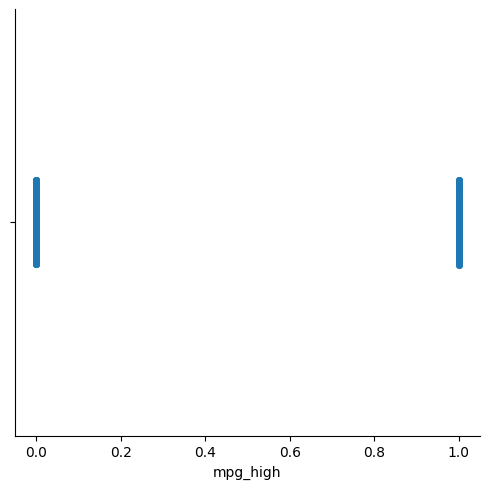

In [ ]:
import seaborn as sb

mpg_high = df['mpg_high']

sb.catplot(x=mpg_high ,data=mpg_high)

mpg_high is divided into two different categories that is 1s and 0s. In this data it can be seen that there are equal number of 0s and 1s

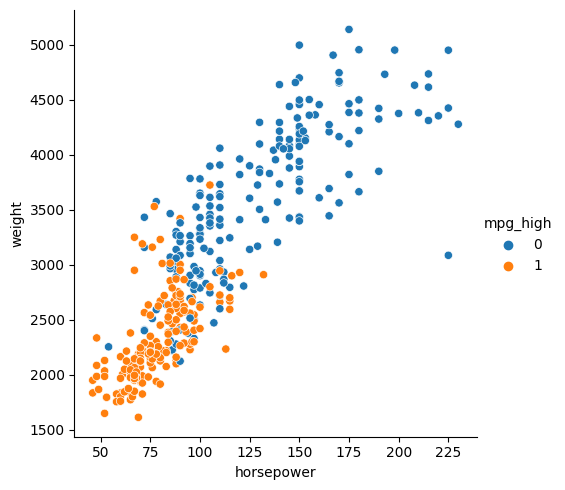

In [ ]:
sb.relplot(x=df.horsepower, y=df.weight, hue=mpg_high)

In this graph we can see that higher the weight higher the horsepower would be.

<Axes: xlabel='mpg_high', ylabel='weight'>

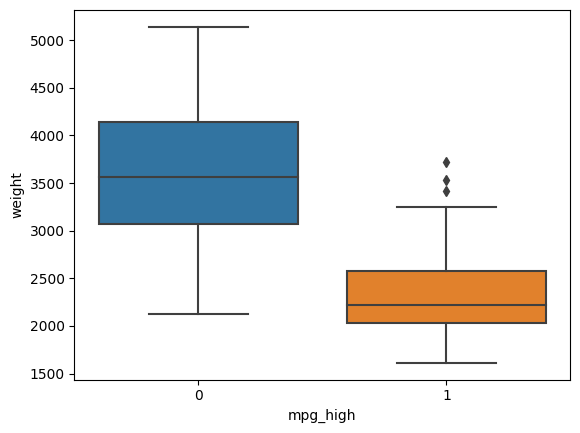

In [ ]:
sb.boxplot(x=mpg_high, y=df.weight)

In this box plot we can see that for category 1 there are 3 outliers. The bar in the middle of a boxplot shows the median value of that boxplot. For 1 we can infer that some of the weight are more median value.

# 7. Train/test split 
In this section the data will be split into 80/20 parts with 80% being the training data and 20% being the testing data.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:-1] # up until the last column which is mpg_high
Y= df.iloc[:, -1] # only the last column
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print('training size:', X_train.shape)
print('testing size:', X_test.shape)

training size: (311, 7)
testing size: (78, 7)


# 8. Logistic Regression

In this section we will perform logistic regression on the training data. Then we will evaluate the model and print the metric using classification report

In [ ]:
#Training the data
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)
logistic_regression_model.score(X_train, Y_train)
predict = logistic_regression_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(Y_test, predict))
print('precision score: ', precision_score(Y_test, predict))
print('recall score: ', recall_score(Y_test, predict))
print('f1 score: ', f1_score(Y_test, predict))

accuracy score:  0.8589743589743589
precision score:  0.7297297297297297
recall score:  0.9642857142857143
f1 score:  0.8307692307692307


In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



Here we can see the metrics for the logistic regression model. The model have an accuracy of 86% with a precision of 98% for category 0 and 73% for category 1.

# Decision Tree
In this section we will perform Decision Tree on the training data. Then we will evaluate the model and print the metric using classification report


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

#make prediction
predict_decision_tree_model = decision_tree_model.predict(X_test)

In [ ]:
# evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(Y_test, predict_decision_tree_model))
print('precision score: ', precision_score(Y_test, predict_decision_tree_model))
print('recall score: ', recall_score(Y_test, predict_decision_tree_model))
print('f1 score: ', f1_score(Y_test, predict_decision_tree_model))

accuracy score:  0.9102564102564102
precision score:  0.8387096774193549
recall score:  0.9285714285714286
f1 score:  0.8813559322033899


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, predict_decision_tree_model)

array([[45,  5],
       [ 2, 26]])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict_decision_tree_model))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.84      0.93      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



Here we can see the metrics for the Decision Tree model. The model have an accuracy of 91% with a precision of 94% for category 0 and 86% for category 1.

# 10. Neural Network 
In this section we will be building neural networks.

First we scale the data:

In [ ]:
# normalize the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Once the data have been scaled, then we will create neural networks

###10 a) First Neural Model
This neural network uses sgd as solver and have one hidden layer with 3 nodes.

In [ ]:
# train 
from sklearn.neural_network import MLPClassifier

neural_networks = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), max_iter=700, random_state=1234)
neural_networks.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=700, random_state=1234,
              solver='sgd')

In [ ]:
# make predictions

predict_neural_networks = neural_networks.predict(X_test_scaled)

In [ ]:
# output results

print('accuracy = ', accuracy_score(Y_test, predict_neural_networks))

confusion_matrix(Y_test, predict_neural_networks)

accuracy =  0.8333333333333334


array([[40, 10],
       [ 3, 25]])

In [ ]:
#Output classification report
print(classification_report(Y_test, predict_neural_networks))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.71      0.89      0.79        28

    accuracy                           0.83        78
   macro avg       0.82      0.85      0.83        78
weighted avg       0.85      0.83      0.84        78



###10 a) Second Neural Model
This neural network uses lbfgs as solver and have two hidden layer with 6 nodes.

In [ ]:
#train
second_neural_network = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4, 2), max_iter=1500, random_state=1234)
second_neural_network.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(4, 2), max_iter=1500, random_state=1234,
              solver='lbfgs')

In [ ]:
# make predictions

predict_second_neural_networks = second_neural_network.predict(X_test_scaled)

In [ ]:
# output results

print('accuracy = ', accuracy_score(Y_test, predict_second_neural_networks))

confusion_matrix(Y_test, predict_second_neural_networks)

accuracy =  0.8846153846153846


array([[43,  7],
       [ 2, 26]])

In [ ]:
#Output classification report
print(classification_report(Y_test, predict_second_neural_networks))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.79      0.93      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.90      0.88      0.89        78



In [ ]:
print('accuracy of First Neural Network= ', accuracy_score(Y_test, predict_neural_networks))
print('accuracy of Second Neural Network= ', accuracy_score(Y_test, predict_second_neural_networks))

accuracy of First Neural Network=  0.8333333333333334
accuracy of Second Neural Network=  0.8846153846153846


The accuracy of first neural network was 83.33% while the accuracy of second neural network was 88.46%. Second neural network performance was better than the first neural network performance. I think this due to the hidden layer sizes, nodes and iterations. For the first neural network there was only one hidden layer with 3 nodes and the iteration was 700 while for second neural network there were two hidden layers with 6 nodes over 1500 iteratons.

# 1. Analysis

Decision Tree algorithm performed better than Logistic regression and neural network with an accuracy of 91%. 

|       Model Name      |  Accuracy |  Recall |  Precision  |
|:---------------------:|:---------:|:-------:|:-----------:|
|  Logistic Regression  |    0.86   |   0.96  |     0.73    |
|     Decision Tree     |    0.91   |   0.89  |     0.86    |
|  First Neural Network |    0.83   |   0.89  |     0.71    |
| Second Neural Network |    0.88   |   0.93  |     0.79    |
  

  
From the table above we can see that the Decision tree has the highest accuracy and first neural network have the least accuracy among all the algorithm listed in the table. Recall which is also known as sensitivity is the highest for Logistic regression and lowest for decision tree and first neural network. Precision was highest for the Decision tree and lowest for first neural network. We can conclude that Decision Tree have the highest performance metrics and first neural network have the lowest performance metric 


Decision tree outperformed others algorithm because the dataset was small. Also NAs also affect the result and we dropped some values from that dataset which were NAs. Decision tree aren't affected by any missing values.  

I would prefer sklearn in python vs R. The reason is because sklearn have very good documentations. When I ran into issues during this assignment I was instantly able to find solutions to the problems as opposed to R. I felt like Sklearn is much more flexible than R and it was much easier to code in sklearn. I do miss one functionality from R and that is when you double click on a loaded dataset under the environment tab it instantly opens the dataset in the new window in which you can inspect the contents of the dataset.

In [ ]:
!jupyter nbconver --to html 